<a href="https://colab.research.google.com/github/lewisnjue/AI/blob/main/src/machine_learning/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
# download the data
!pip install -U pandas-profiling[notebook]

In [214]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'


In [215]:
from urllib.request import urlretrieve

In [216]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7ced218ebe80>)

In [217]:
import pandas as pd


In [218]:
medical_df = pd.read_csv('medical.csv')

In [219]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [220]:
"""
THE DATA SET CONTINES 1338 ROWS AND 7 COLUMNS . EACH ROW OF THE DATASET INFORMATION ABOUT THE PEOPLE IN THE
ONE CUSTOMER .
OUR OBJECTIVE IS TO FIND A WAY TO ESTIMATE THE VALUE IN THE "CHARGES" COLUMN USING THE VALUES
IN THE OTHER COLUMNS . IF WE CAN DO SO FOR THE HISTORICAL DATA , THEN WE SHOULD BE ABOLE TO ESTIMATE CHARGES FOR
NEW CUSTOMERS TOO, SIMPLIY BY ASKING INFOMATION LIKE THEIR AGE, SETX, BMI , NO OF CHIILDRENS , REGION ETC.,
SMIKING HABITS AND REGION .
LETS CHECK THE DATA TYPE OF EACH COLUMN .
"""
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [221]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [222]:
!pip install plotly matplotlib seaborn --quiet

In [223]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [224]:
# the following settings will imporve the default style and font sizes for out charts
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [225]:
"""
AGE :
age is a numeric column . the minimun age in the dataset is 18 and the maximum age is 64 .
thus , we can visulaize the distribution of age using a histogram  with 47 bins(one for each year)
and a box plot . we use plotly to make the cart interactive , beut you can crate similar chars using seaborn
"""

'\nAGE :\nage is a numeric column . the minimun age in the dataset is 18 and the maximum age is 64 .\nthus , we can visulaize the distribution of age using a histogram  with 47 bins(one for each year)\nand a box plot . we use plotly to make the cart interactive , beut you can crate similar chars using seaborn\n'

In [226]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [227]:
fig = px.histogram(medical_df,x='age',marginal='box',nbins=47,title='Distribution of age')
fig.update_layout(bargap=0.1)
fig.show()

In [228]:
"""
the distributon of age in the dateset is almost uniform ,with 20-30 customers ata every age,
expecept for the age 18 and 19 , which seem to have over twice as many customers as other ages, the uniform distrubion might aires from the fact that  there inst a ibg variation int eh number of people of any given age in the usa
"""


'\nthe distributon of age in the dateset is almost uniform ,with 20-30 customers ata every age,\nexpecept for the age 18 and 19 , which seem to have over twice as many customers as other ages, the uniform distrubion might aires from the fact that  there inst a ibg variation int eh number of people of any given age in the usa\n'

In [229]:

"""
body mass index
"""
fig = px.histogram(medical_df,x='bmi',marginal='box',nbins=47,title='Distribution of BMI values',color_discrete_sequence=['red'])
fig.update_layout(bargap=0.1)
fig.show()

In [230]:
"""
the measurement of body mass index seems to forma gaussion distribution centred aroudn the value 30, with
a few outliers towards the right
"""

'\nthe measurement of body mass index seems to forma gaussion distribution centred aroudn the value 30, with\na few outliers towards the right\n'

In [231]:
# CHARGES
fig = px.histogram(medical_df,x='charges',marginal='box',nbins=47,title='Distribution of charges',color_discrete_sequence=['green','grey'],color='smoker')
fig.update_layout(bargap=0.1)
fig.show()

In [232]:
"""
We can make the following observations from the above graph:

    For most customers, the annual medical charges are under \$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
    There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is \7300,themedianforsmokersiscloseto7300,themedianforsmokersiscloseto35,000.
"""

'\nWe can make the following observations from the above graph:\n\n    For most customers, the annual medical charges are under \\$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"\n    There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is ǘ0,themedianforsmokersiscloseto7300,themedianforsmokersiscloseto35,000.\n'

In [233]:
# SMOKER
fig = px.histogram(medical_df,x='smoker',title='Distribution of smoker',color='sex')
fig.update_layout(bargap=0.1)
fig.show()

In [234]:
"""
It appears that 20% of customers have reported that they smoke. Can you verify whether this matches the national average, assuming the data was collected in 2010? We can also see that smoking appears a more common habit among males. Can you verify this?
"""

'\nIt appears that 20% of customers have reported that they smoke. Can you verify whether this matches the national average, assuming the data was collected in 2010? We can also see that smoking appears a more common habit among males. Can you verify this?\n'

In [235]:
"""
having looked at indivial columsn , we can now visualzie the relationship btween " charges" and other columns .
"""


'\nhaving looked at indivial columsn , we can now visualzie the relationship btween " charges" and other columns .\n'

In [236]:
"AGE AND CHARGES"
fig = px.scatter(medical_df,x='age',y='charges',title='Age vs Charges',color='smoker',opacity=0.8,hover_data=['sex'],)
fig.update_layout(bargap=0.1)
fig.show()

In [237]:
"""
We can make the following observations from the above chart:

    The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.

    We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

        The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others

        The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".

        The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.
"""


'\nWe can make the following observations from the above chart:\n\n    The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it\'s clear that age alone cannot be used to accurately determine medical charges.\n\n    We can see three "clusters" of points, each of which seems to form a line with an increasing slope:\n\n        The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others\n\n        The second cluster contains a mix of smokers and non-smokers. It\'s possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".\n\n        The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.\n'

In [238]:
"""
BMI AND CHARGES
"""

'\nBMI AND CHARGES\n'

In [239]:
fig = px.scatter(medical_df,x='bmi',y='charges',color='smoker',opacity=0.8,hover_data=['sex'],title='bmi vs charges')
fig.update_traces(marker_size=5)
fig.show()

In [240]:
"""
it apperas that for non smokers , an increase in bmi doest seem to be realted to an icrease in
medical charges . however , medical charges seem to be significallty high for smoker
with a bmi greater than 30
"""

'\nit apperas that for non smokers , an increase in bmi doest seem to be realted to an icrease in\nmedical charges . however , medical charges seem to be significallty high for smoker\nwith a bmi greater than 30\n'

In [241]:
# CORRELATION
"""
AS YOU CAN TELL FROM THE ANALYSIS , THE VALUES IN SOME COLUMSN ARE MORE CLOSELY REATED TO THE VALUES IN
CHARGES COMPARED TO OTHER COLUMSN EG AGE AND CHARGES SEEM TO GRO TOGETHERE WHEREAS BMI AND
CHARGES DONT
THIS REALTION SHIP IS OFTEN EXPRESSED NUMERICALLY USING A MEASURE CALLED THE
CORRELTION COEFFICENT
WHICH CANBE COMPUTED USING THE  .corr method of pandas sereis

"""


'\nAS YOU CAN TELL FROM THE ANALYSIS , THE VALUES IN SOME COLUMSN ARE MORE CLOSELY REATED TO THE VALUES IN\nCHARGES COMPARED TO OTHER COLUMSN EG AGE AND CHARGES SEEM TO GRO TOGETHERE WHEREAS BMI AND\nCHARGES DONT\nTHIS REALTION SHIP IS OFTEN EXPRESSED NUMERICALLY USING A MEASURE CALLED THE\nCORRELTION COEFFICENT\nWHICH CANBE COMPUTED USING THE  .corr method of pandas sereis\n\n'

In [242]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [243]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [244]:
# to compute the correlation for categorical columsn they must first be conveted into numeric columns
smoker_values = {'no':0,'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

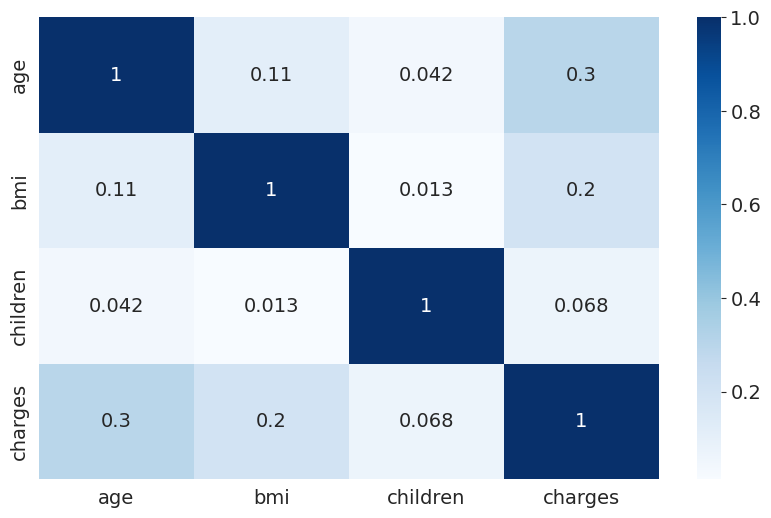

In [245]:
# the result of .corr is called a correltion matrix and is often visulaize duising a heatmap

numerical_cols = medical_df.select_dtypes('number').columns
corr_matrix = medical_df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

In [246]:
medical_df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [247]:
"""
Notebook Image

Correlation vs causation fallacy: Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features XX and YY can be correlated if XX causes YY or if YY causes XX, or if both are caused independently by some other factor ZZ, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that XX are YY simply appear to be correlated because the sample is too small.

While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.
"""



"\nNotebook Image\n\nCorrelation vs causation fallacy: Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features XX and YY can be correlated if XX causes YY or if YY causes XX, or if both are caused independently by some other factor ZZ, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that XX are YY simply appear to be correlated because the sample is too small.\n\nWhile this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.\n"

In [248]:
# LINEAR REGRESSION USING A SINGLE FEATURE
"""
WE NOW KNWO THAT THE SMOKER AND AGE COLUMNS HAVE THE STROGHEST CORRELATION WITH
CHARGES . LETS TRY TO FIND A WAY OF ESTIMATIN THE VALUE OF CHARGES USING THE VALUE OF AGE
FOR NON SMOKERS FIRST , LETS COREATE A DATA FRAME CONTAINGN JSUUT THE DATA FOR NON SMOKERS
"""


'\nWE NOW KNWO THAT THE SMOKER AND AGE COLUMNS HAVE THE STROGHEST CORRELATION WITH\nCHARGES . LETS TRY TO FIND A WAY OF ESTIMATIN THE VALUE OF CHARGES USING THE VALUE OF AGE\nFOR NON SMOKERS FIRST , LETS COREATE A DATA FRAME CONTAINGN JSUUT THE DATA FOR NON SMOKERS\n'

In [249]:
non_smoker_df = medical_df[medical_df.smoker == 'no']


<Axes: title={'center': 'age vs charges'}, xlabel='age', ylabel='charges'>

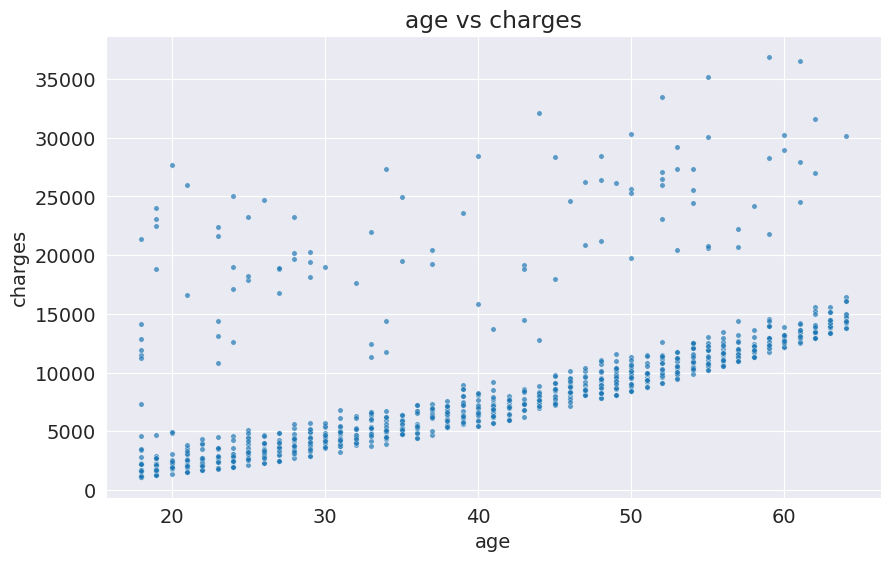

In [250]:
plt.title('age vs charges')
sns.scatterplot(data=non_smoker_df,x='age',y='charges',alpha=0.7,s=15)

In [251]:
"""
apart form a few excpetion , the points seem to foam a line . well try and fit a line usint this points , and use the line to predict charges for
a given age. a line one the x& y coordicnate have the formula:
y = wx + b
the line is characcterized tow number : w : (called 'slope') and b called intercpet
MODEL
in the above case the x axis shows age and the y axis show s charges , thus were assuming the
following relationship between the two :
charges = w * age + b
well try determine w and b for the line that est filts the data
- this techinue is called linerar regression and we call the above equeaito a linear regression model ,
because it models the realtionshp between age and charges as a strainht line .
- the numbers w and b are the parameters or weights of the model .
- the values in teh age columns of the dataset are called the inputsof the model and the values in the chareg column are called targes
lets define a helper function estimate_charges to compute charges given age , w and b

"""

"\napart form a few excpetion , the points seem to foam a line . well try and fit a line usint this points , and use the line to predict charges for\na given age. a line one the x& y coordicnate have the formula:\ny = wx + b\nthe line is characcterized tow number : w : (called 'slope') and b called intercpet\nMODEL\nin the above case the x axis shows age and the y axis show s charges , thus were assuming the\nfollowing relationship between the two :\ncharges = w * age + b\nwell try determine w and b for the line that est filts the data\n- this techinue is called linerar regression and we call the above equeaito a linear regression model ,\nbecause it models the realtionshp between age and charges as a strainht line .\n- the numbers w and b are the parameters or weights of the model .\n- the values in teh age columns of the dataset are called the inputsof the model and the values in the chareg column are called targes\nlets define a helper function estimate_charges to compute charges gi

In [252]:
def estimate_charges(age,w,b):
  return w * age + b


In [253]:
# the estimate_charges function is our very first model
w = 50
b = 100
age = non_smoker_df.age
estimated_charges = estimate_charges(age,w,b)

Text(0.5, 1.0, 'age vs charges')

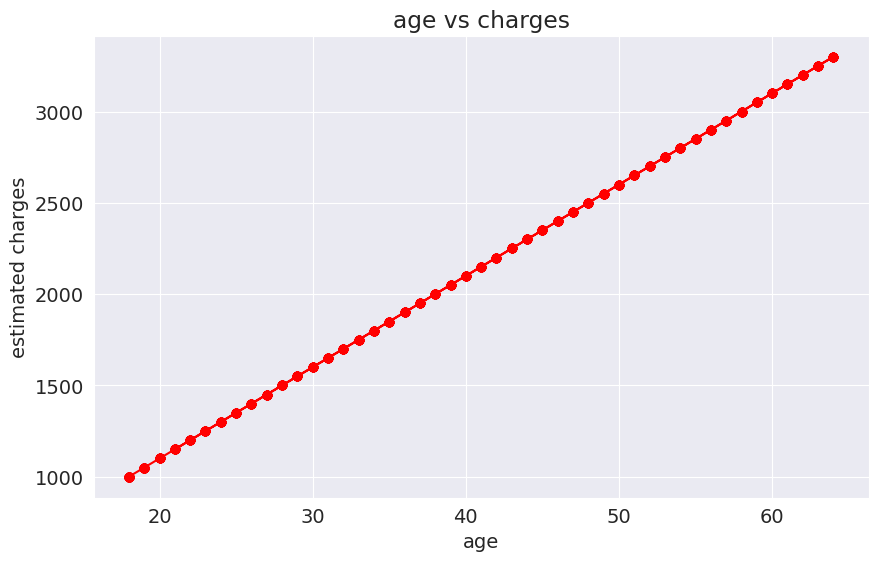

In [254]:
# we can plot estimated charges ung a line graph
plt.plot(age,estimated_charges,'r-o')
plt.xlabel('age')
plt.ylabel('estimated charges')
plt.title('age vs charges')


<ipython-input-255-4429a570941d>:7: UserWarning:

Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries



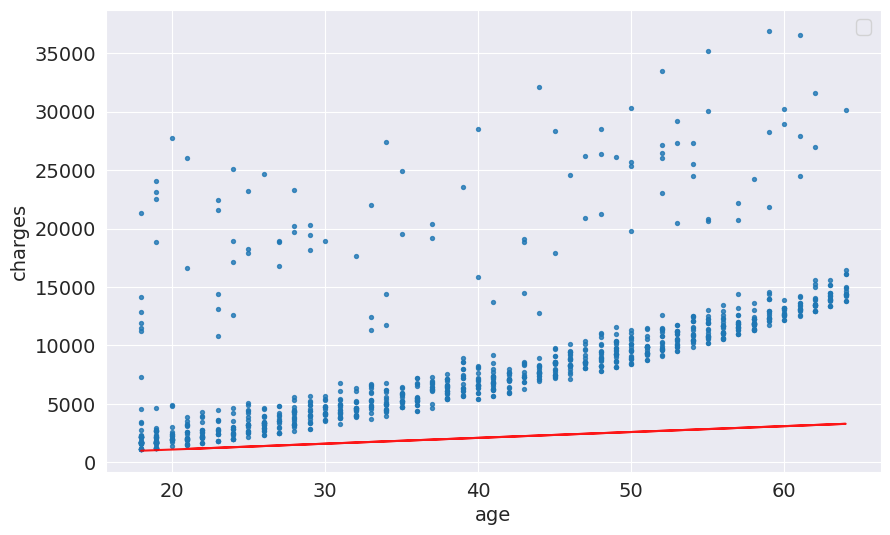

In [255]:
# we can ovelay this line on the actual data so see how well our modle fits the data
target = non_smoker_df.charges
plt.plot(age,estimated_charges,'r',alpha=0.9)
plt.scatter(age,target,s=8,alpha=0.8)
plt.xlabel('age')
plt.ylabel('charges')
plt.legend('estimate ','actual')


In [256]:
"""
CLEARY , THE OUT ESTIMATES ARE QUITE POOR AND THE LINEDOES NOT FIT THE DATA . HOWEVER WE CAN
TRY DIFFERENT VALUES OF W AND B TO MOVE AROUND LET DEFIEN A HELPER FUNTION TRY_PARAMETERS WHICH TAKES W AND B AS INPUTS AND CRATE THE ABOVE PLOT
"""

'\nCLEARY , THE OUT ESTIMATES ARE QUITE POOR AND THE LINEDOES NOT FIT THE DATA . HOWEVER WE CAN\nTRY DIFFERENT VALUES OF W AND B TO MOVE AROUND LET DEFIEN A HELPER FUNTION TRY_PARAMETERS WHICH TAKES W AND B AS INPUTS AND CRATE THE ABOVE PLOT\n'

In [257]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);


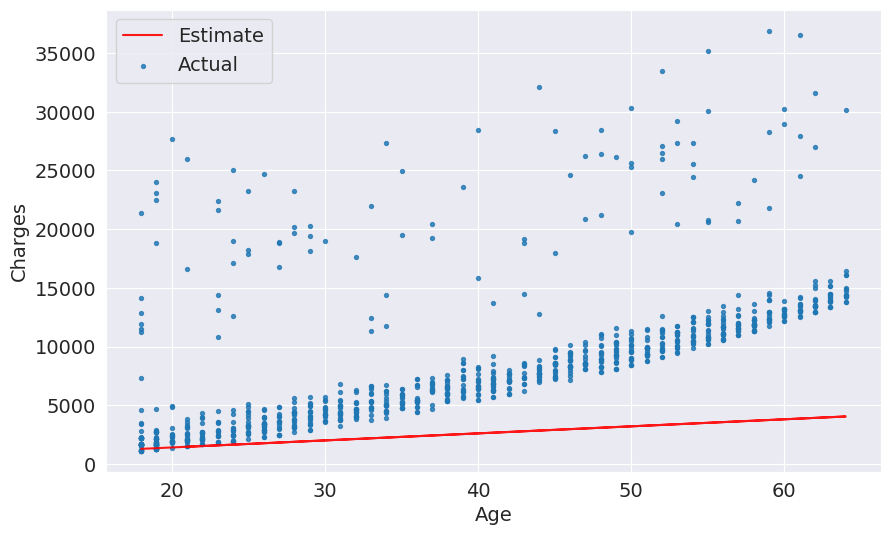

In [258]:
try_parameters(60, 200)

In [259]:
"""
as we change the values of w and b manually , triing to move the line visually closer to thepoints , we are learning theapproximate
relationhip between age anc charges .
wond it be nice if a computer could try sveral difren values of w and b and learn the relatiophip between age anc chargse ? to do thi we need to solve a comput of problmes :
1. we need a way to measure numerically how well the line files the pooints .
2. once the mesure of fi hass been cmputed we need a way to modify w and b to imporve the fit.
if we can solve above problmes it should be possible fora mputer to determine
w and b for the best fit line starint from a random guess .
"""


'\nas we change the values of w and b manually , triing to move the line visually closer to thepoints , we are learning theapproximate\nrelationhip between age anc charges .\nwond it be nice if a computer could try sveral difren values of w and b and learn the relatiophip between age anc chargse ? to do thi we need to solve a comput of problmes :\n1. we need a way to measure numerically how well the line files the pooints .\n2. once the mesure of fi hass been cmputed we need a way to modify w and b to imporve the fit.\nif we can solve above problmes it should be possible fora mputer to determine\nw and b for the best fit line starint from a random guess .\n'

In [260]:
# LOSS / COST FUCTION
"""


We can compare our model's predictions with the actual targets using the following method:

    Calculate the difference between the targets and predictions (the differenced is called the "residual")
    Square all elements of the difference matrix to remove negative values.
    Calculate the average of the elements in the resulting matrix.
    Take the square root of the result
    THE RESULT IS A SINGLE NUMBER KNOW AS THE root mean squared error (RMSE).
"""


'\n\n\nWe can compare our model\'s predictions with the actual targets using the following method:\n\n    Calculate the difference between the targets and predictions (the differenced is called the "residual")\n    Square all elements of the difference matrix to remove negative values.\n    Calculate the average of the elements in the resulting matrix.\n    Take the square root of the result\n    THE RESULT IS A SINGLE NUMBER KNOW AS THE root mean squared error (RMSE).\n'

In [261]:
# lets defien a funtion to cmpute the rmse
!pip install numpy --quiet


In [262]:
import numpy as np

In [263]:
def rmse(targets,predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))


In [264]:
w = 50
b = 100

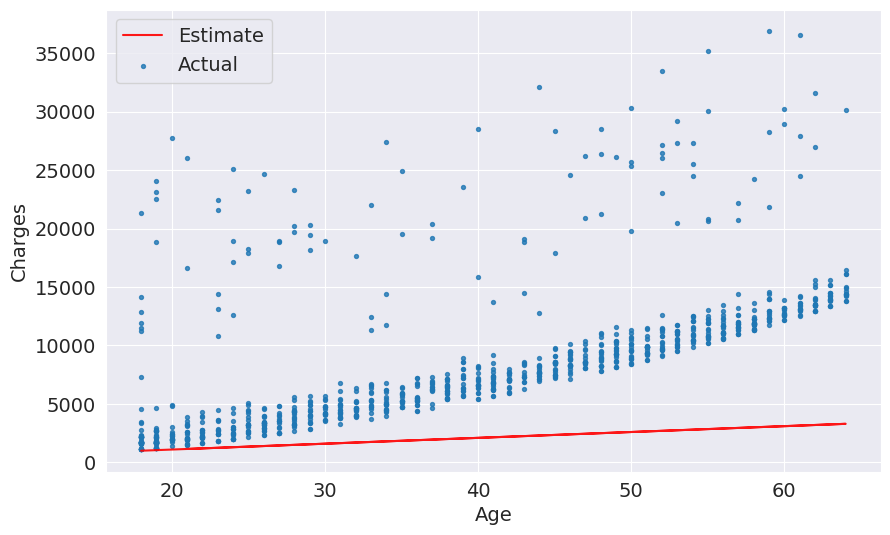

In [265]:
try_parameters(w,b)

In [266]:
targets = non_smoker_df.charges
predicted = estimate_charges(non_smoker_df.age,w,b)

In [267]:
rmse(targets,predicted)

8461.949562575493

In [268]:
"""
Here's how we can interpret the above number: On average, each element in the prediction differs from the actual target by \$8461.

The result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.
"""


"\nHere's how we can interpret the above number: On average, each element in the prediction differs from the actual target by \\$8461.\n\nThe result is called the loss because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.\n"

In [269]:
# lets modify the try_parameters funtion to also display the loss
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages,w,b)
    plt.plot(ages, predictions, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8,alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
    loss = rmse(target, predictions)
    print('Loss:', loss)

    estimated_charges = estimate_charges(ages, w, b)

Loss: 8461.949562575493


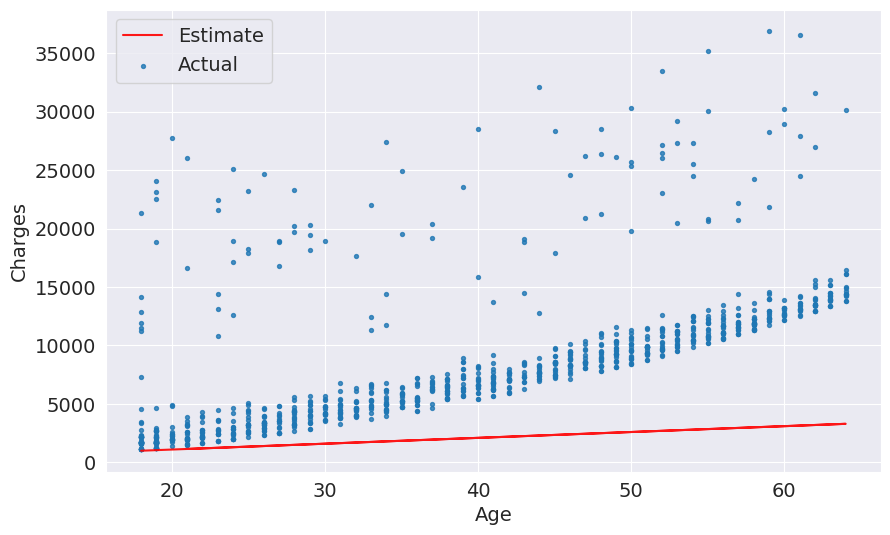

In [270]:
try_parameters(50, 100)

In [271]:
# optimizer
"""
next we need a strategy to modify wieihts w and b to reduce the loss
andimporive the fit of th line to the data
you can use
- orinary least squres
- stochastic gradient descent

both of these have the same objective : to minimize the loss , however while oridnaly least squres
directly cmputes the est values for w and b using matrix operation while gradient descent uses
a iterative approach starting with  a random values of w and b and slowly improving
them using derivates

"""



'\nnext we need a strategy to modify wieihts w and b to reduce the loss\nandimporive the fit of th line to the data\nyou can use\n- orinary least squres\n- stochastic gradient descent\n\nboth of these have the same objective : to minimize the loss , however while oridnaly least squres\ndirectly cmputes the est values for w and b using matrix operation while gradient descent uses\na iterative approach starting with  a random values of w and b and slowly improving\nthem using derivates\n\n'

In [272]:
# linear regression using scikit-learn
"""
in practice , your never need to implement either of the above method yourself, you can use a
library like scikit-learn to do this for your
"""

'\nin practice , your never need to implement either of the above method yourself, you can use a\nlibrary like scikit-learn to do this for your\n'

In [273]:
!pip install scikit-learn --quiet

In [274]:
"""
lets use the linear regression class from scikit-learn to fint the best fit
for age vs charges using the oridnalry squres optimization techinique
"""


'\nlets use the linear regression class from scikit-learn to fint the best fit\nfor age vs charges using the oridnalry squres optimization techinique\n'

In [275]:
from sklearn.linear_model import LinearRegression

In [276]:
model = LinearRegression()

In [277]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [278]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('input.shape:',inputs.shape)
print('targets.shape:',targets.shape)


input.shape: (1064, 1)
targets.shape: (1064,)


In [279]:
model.fit(inputs,targets)


LinearRegression()

In [280]:
# we can now make predictions using the model. lets try predicting the charges for the ae 223,37,and 61
model.predict(np.array([[22],[37],[61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 3788.05552572,  7796.78921819, 14210.76312614])

In [281]:
# lets compute the predictions for the entire set of inputs
predictions = model.predict(inputs)

In [282]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [283]:
# lets compute the RMSE LOSS OF EVALUTE THE MODEL
rmse(targets,predictions)

4662.505766636395

In [284]:
# seems like our prediction is off by 4000 on average which is not too bad considering the fact that there are several outleiars
# the parametesr ofthe modle are stored int eh coef_ and intercept_ propers
model.coef_

array([267.24891283])

In [285]:
model.intercept_
#b

-2091.4205565650864

In [286]:
"""
are these parametesr close to your best guesses ?
lets visualize the line created by the above parmetesr
"""

'\nare these parametesr close to your best guesses ?\nlets visualize the line created by the above parmetesr\n'

Loss: 4662.505766636395


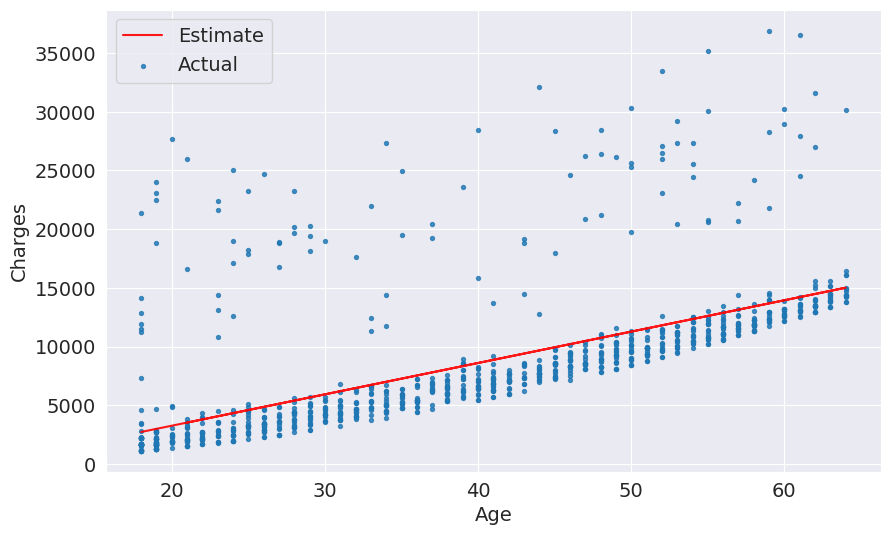

In [287]:
try_parameters(model.coef_,model.intercept_)

In [288]:
# indeed the lien is quite close to the points .it is slightly above the clusterof the points becus e o th otuliers


In [289]:
## MACHINE LEARNING
"""
EVERY MACHINE LEANRING PROBLME HAS THREE COMPONENTS
1. MODEL
2. COST FUNCTION
3. OPTIMIZATION ALGORITHM ( OPTIMIZER)
"""


'\nEVERY MACHINE LEANRING PROBLME HAS THREE COMPONENTS\n1. MODEL\n2. COST FUNCTION\n3. OPTIMIZATION ALGORITHM ( OPTIMIZER)\n'

In [290]:
"""
AS WEVE SEEN ABOVE ITS TAKES A FIEW LINE OF CODE TO TRAIN A MAHCINE LEARNING MODEL USING SCKITIT-LEARN
"""


'\nAS WEVE SEEN ABOVE ITS TAKES A FIEW LINE OF CODE TO TRAIN A MAHCINE LEARNING MODEL USING SCKITIT-LEARN\n'

In [291]:
# CREATE inputes and targets
inputs , targes = non_smoker_df[['age']],non_smoker_df['charges']
# crate and train the model
model = LinearRegression().fit(inputs,targets)
# generate proedictions
predictions = model.predict(inputs)
# compute the loss
rmse(targets,predictions)
print('loss:',rmse(targets,predictions))


loss: 4662.505766636395


## using categorical features for machine learning

so far weve been using only numeric columns , since we can nly perform computations with numbers . ifwe could use categorical  columns like 'smokder' we can train a single model for the entire dataset .
to use the categorical columsn we simply need to convert them to numbers . there are three common techiniques for doing this :

- if a categoriccl column has just two categoris ( its called a binary category) them we can repace ther valeus with 0 and 1

- if a categorical column has more than 2 caegoris we can perfom one hot encoding ie craete a nw column for each category with 1s and 0s

- if a categoris have a natural order then they can be conveted to numbers preservign the order . these are called ordinals

## BINARY CATEGORS
the smoker categorsy has just two values yes and no lets crate a new column smoker_code contain g 0 for no and 1 for yes



<Axes: xlabel='smoker', ylabel='charges'>

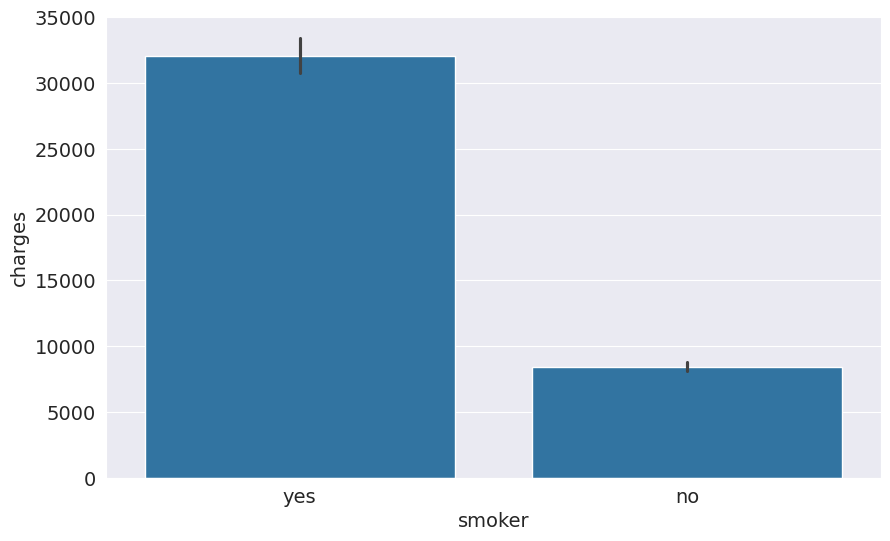

In [292]:
sns.barplot(data=medical_df,x='smoker',y='charges')

In [293]:
smoker_codes = {'no':0,'yes':1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [294]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [295]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [296]:
inputs , targets = medical_df[['age','bmi','children','smoker_code']],medical_df.charges
model = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print('loss:',loss)

loss: 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

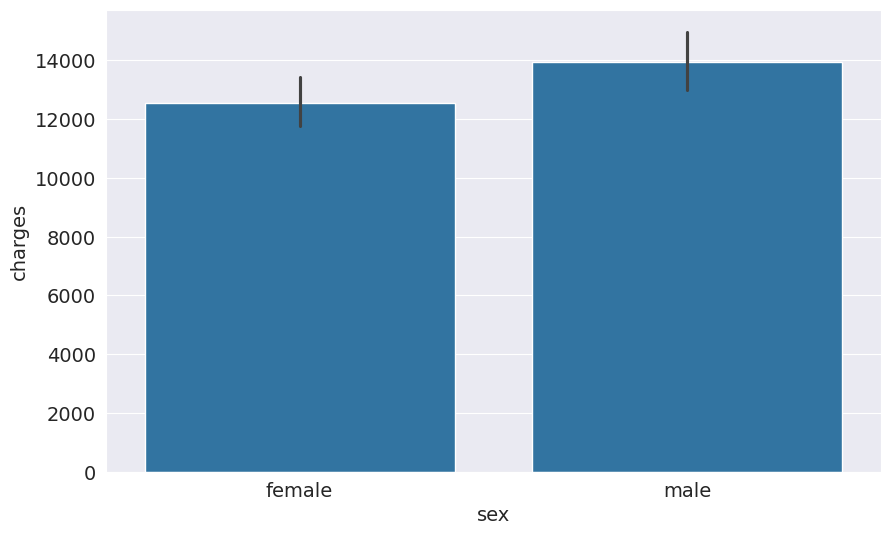

In [297]:
sns.barplot(data=medical_df,x='sex',y='charges')

In [298]:
sex_codes = {'female':0,'male':1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [299]:
inputs,targets = medical_df[['age','bmi','children','smoker_code','sex_code']],medical_df.charges

In [300]:
model = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print('loss:',loss)

loss: 6056.100708754546


## ONE HOT ENCODING
the region column contains 4 vales  so well need to use hot encoding and crate a new column for each region

<Axes: xlabel='region', ylabel='charges'>

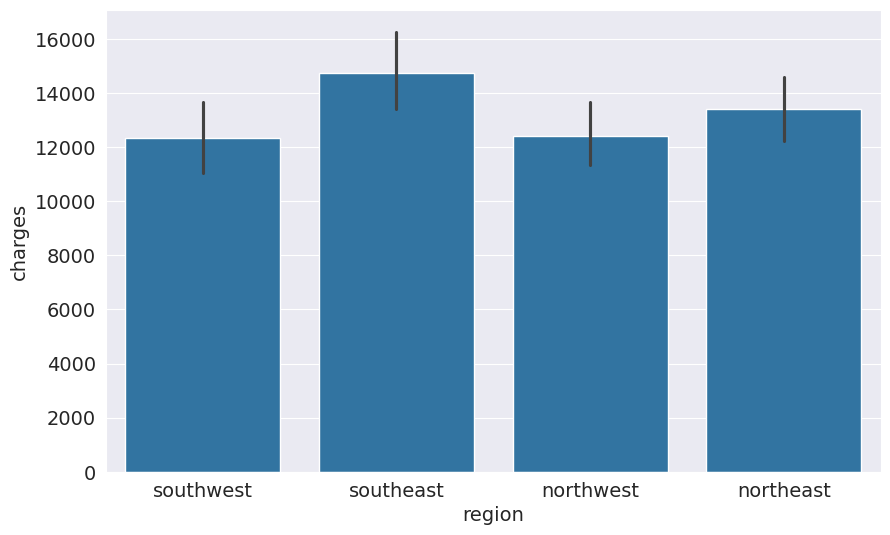

In [301]:
sns.barplot(data=medical_df,x='region',y='charges')

In [302]:
from sklearn import preprocessing

In [303]:
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [304]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [305]:
medical_df[['northeast','northwest','southeast','southwest']] = one_hot

In [306]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [307]:
inputs_cols = ['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']
inputs,targets = medical_df[inputs_cols],medical_df.charges


In [308]:
model = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print('loss:',loss)

loss: 6041.6796511744515


## MODEL IMPRVEMENTS
lets discuss and apply some more imporvemtn to our model .
### feature scaling

recall that due to regulatory requirments we also need to explain the retionale behind the prediction our model .

to compare the importance of each feture in the model our first intant might be to compare thier wiehts


In [309]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [310]:
model.intercept_

-12525.547811195444

In [311]:
weights_df = pd.DataFrame({
    'feature':inputs.columns,
    'weight':model.coef_
})

In [312]:
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756


while it seems like bmi and the norteash have a higher weiiths than age, keep in mind that the range of vales for bmi is limited and the rnortheash column only takes the valeus o and 1 .
becluse diffrent columns have diffrent rages , we runinto isssur:

- we cant compare the weithgs of diffrent columsn to identify which feturs are imprtant

- a column with a larger ragne of impouts may despoparilet affect the loss and dominate the optimizaito process .
for this resaon , its commo practice to scale ( to standardize) the vlaues in numeric columto  subratnt the mean and dividng the thestand deviaton


In [313]:
from sklearn.preprocessing import StandardScaler


In [314]:
numerical_cols = ['age','bmi','children']
scaler = StandardScaler()
scaler.fit(medical_df[numerical_cols])


StandardScaler()

In [315]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [316]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [318]:
scaled_inputs = scaler.transform(medical_df[numerical_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [319]:
cat_colus = ['smoker_code','sex_code','northeast','northwest','southeast','southwest']
categorical_data = medical_df[cat_colus].values
inputs = np.concatenate([scaled_inputs,categorical_data],axis=1)

targets = medical_df.charges

model = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print('loss:',loss)

loss: 6041.6796511744515


In [320]:
weights_df = pd.DataFrame({
    'feature':numerical_cols+cat_colus,
    'weight':model.coef_
})

In [321]:
weights_df

,feature,weight
0,age,3607.472736
1,bmi,2067.691966
2,children,572.998210
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
